In [1]:
%matplotlib inline
import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

Converting to date time format

In [2]:
df = pd.read_csv('Blinded_Data.csv')
df.drop(columns=["72 Hr Return Time"],axis=1,inplace=True)
df['Arrival Date/Time'] = df['Arrival Date/Time'].astype(str)
df['Arrival Date/Time'] = pd.to_datetime(df['Arrival Date/Time'], format="%m/%d/%Y %H:%M")
df['Depart Date/Time'] = df['Depart Date/Time'].astype(str)
df['Depart Date/Time'] = pd.to_datetime(df['Depart Date/Time'], format="%m/%d/%Y %H:%M")
df.dtypes

Arrival Date/Time    datetime64[ns]
Dispo Date/Time              object
Depart Date/Time     datetime64[ns]
Disposition                  object
ESI Score                     int64
dtype: object

## Number of Patients

In [3]:
# len(cp)
df['PatientCount']=None
# df

In [4]:
for i in range(len(df)):
    cp = None
    cp = df[df['Arrival Date/Time']<=df.iloc[i]['Depart Date/Time']]
    cp = cp[cp['Arrival Date/Time']>=df.iloc[i]['Arrival Date/Time']]
    df.iloc[i, df.columns.get_loc('PatientCount')] = len(cp)
    

In [6]:
df.head()

,Arrival Date/Time,Dispo Date/Time,Depart Date/Time,Disposition,ESI Score,PatientCount
0,2019-02-22 00:02:00,NaN,2019-02-23 16:35:00,Unknown,2,254
1,2019-02-22 00:35:00,2/22/2019 3:35,2019-02-22 03:35:00,LWOT,3,15
2,2019-02-22 00:44:00,2/22/2019 3:44,2019-02-22 03:44:00,LWOT,3,14
3,2019-02-22 00:47:00,2/22/2019 3:47,2019-02-22 03:47:00,LWOT,3,13
4,2019-02-22 00:53:00,2/22/2019 3:53,2019-02-22 03:53:00,LWOT,3,12


## Converting multilabel 

In [7]:
df.Disposition.unique()

array(['Unknown', 'LWOT', 'Transferred', 'Admitted', 'Discharge',
       'Expired'], dtype=object)

In [8]:
df['Disposition'] = df['Disposition'].replace(['Unknown','Transferred', 'Admitted', 'Discharge',
       'Expired'],'T')

In [9]:
df.Disposition.unique()

array(['T', 'LWOT'], dtype=object)

## Duration of stay

In [10]:
df['Difference'] = df['Depart Date/Time'].sub(df['Arrival Date/Time'], axis=0)
df.head() 

,Arrival Date/Time,Dispo Date/Time,Depart Date/Time,Disposition,ESI Score,PatientCount,Difference
0,2019-02-22 00:02:00,NaN,2019-02-23 16:35:00,T,2,254,1 days 16:33:00
1,2019-02-22 00:35:00,2/22/2019 3:35,2019-02-22 03:35:00,LWOT,3,15,0 days 03:00:00
2,2019-02-22 00:44:00,2/22/2019 3:44,2019-02-22 03:44:00,LWOT,3,14,0 days 03:00:00
3,2019-02-22 00:47:00,2/22/2019 3:47,2019-02-22 03:47:00,LWOT,3,13,0 days 03:00:00
4,2019-02-22 00:53:00,2/22/2019 3:53,2019-02-22 03:53:00,LWOT,3,12,0 days 03:00:00


In [11]:
df['Duration']=df['Difference'].apply(lambda x:x / np.timedelta64(1, 'h'))

In [12]:
df.drop(columns=["Dispo Date/Time","Difference"],axis=1,inplace=True)
df.head()

,Arrival Date/Time,Depart Date/Time,Disposition,ESI Score,PatientCount,Duration
0,2019-02-22 00:02:00,2019-02-23 16:35:00,T,2,254,40.55
1,2019-02-22 00:35:00,2019-02-22 03:35:00,LWOT,3,15,3.00
2,2019-02-22 00:44:00,2019-02-22 03:44:00,LWOT,3,14,3.00
3,2019-02-22 00:47:00,2019-02-22 03:47:00,LWOT,3,13,3.00
4,2019-02-22 00:53:00,2019-02-22 03:53:00,LWOT,3,12,3.00


## Days in a week

In [13]:
df['day_name'] = df['Arrival Date/Time'].dt.day_name()

In [14]:
df.head()

,Arrival Date/Time,Depart Date/Time,Disposition,ESI Score,PatientCount,Duration,day_name
0,2019-02-22 00:02:00,2019-02-23 16:35:00,T,2,254,40.55,Friday
1,2019-02-22 00:35:00,2019-02-22 03:35:00,LWOT,3,15,3.00,Friday
2,2019-02-22 00:44:00,2019-02-22 03:44:00,LWOT,3,14,3.00,Friday
3,2019-02-22 00:47:00,2019-02-22 03:47:00,LWOT,3,13,3.00,Friday
4,2019-02-22 00:53:00,2019-02-22 03:53:00,LWOT,3,12,3.00,Friday


## Checking in time 

In [15]:
df['Time']=df['Arrival Date/Time'].dt.time


In [16]:
df.head()

,Arrival Date/Time,Depart Date/Time,Disposition,ESI Score,PatientCount,Duration,day_name,Time
0,2019-02-22 00:02:00,2019-02-23 16:35:00,T,2,254,40.55,Friday,00:02:00
1,2019-02-22 00:35:00,2019-02-22 03:35:00,LWOT,3,15,3.00,Friday,00:35:00
2,2019-02-22 00:44:00,2019-02-22 03:44:00,LWOT,3,14,3.00,Friday,00:44:00
3,2019-02-22 00:47:00,2019-02-22 03:47:00,LWOT,3,13,3.00,Friday,00:47:00
4,2019-02-22 00:53:00,2019-02-22 03:53:00,LWOT,3,12,3.00,Friday,00:53:00


## Preprocessing

Keeping the important features

In [17]:
df.drop(columns=["Arrival Date/Time","Depart Date/Time"],axis=1,inplace=True)

Rearranging the columns

In [18]:
df = df.reindex(columns=['Time','day_name','Duration','ESI Score','PatientCount','Disposition'])
df.head()

,Time,day_name,Duration,ESI Score,PatientCount,Disposition
0,00:02:00,Friday,40.55,2,254,T
1,00:35:00,Friday,3.00,3,15,LWOT
2,00:44:00,Friday,3.00,3,14,LWOT
3,00:47:00,Friday,3.00,3,13,LWOT
4,00:53:00,Friday,3.00,3,12,LWOT


In [19]:
df.dtypes

Time             object
day_name         object
Duration        float64
ESI Score         int64
PatientCount     object
Disposition      object
dtype: object

In [20]:
df.to_csv('before_encoding.csv',index=False)

## Check out the missing values

 Check out the missing values->See the Categorical Values->Splitting the data-set into Training and Test Set->Feature Scaling

In [20]:
df.isnull().sum()

Time            0
day_name        0
Duration        0
ESI Score       0
PatientCount    0
Disposition     0
dtype: int64

## check for correlation between features and feature selection

In [21]:
df.corr()

,Duration,ESI Score
Duration,1.000000,-0.161775
ESI Score,-0.161775,1.000000


In [22]:
# import seaborn as sns
# sns.pairplot(df)

In [23]:

# import seaborn as sns
# #get correlations of each features in dataset
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Encoding categorical values

In [24]:
df=pd.get_dummies(df, prefix=['day_name'], columns=['day_name'])

In [25]:
df.head()

,Time,Duration,ESI Score,PatientCount,Disposition,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,00:02:00,40.55,2,254,T,1,0,0,0,0,0,0
1,00:35:00,3.00,3,15,LWOT,1,0,0,0,0,0,0
2,00:44:00,3.00,3,14,LWOT,1,0,0,0,0,0,0
3,00:47:00,3.00,3,13,LWOT,1,0,0,0,0,0,0
4,00:53:00,3.00,3,12,LWOT,1,0,0,0,0,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Disposition'] = labelencoder.fit_transform(df['Disposition'])
df.head()

,Time,Duration,ESI Score,PatientCount,Disposition,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,00:02:00,40.55,2,254,1,1,0,0,0,0,0,0
1,00:35:00,3.00,3,15,0,1,0,0,0,0,0,0
2,00:44:00,3.00,3,14,0,1,0,0,0,0,0,0
3,00:47:00,3.00,3,13,0,1,0,0,0,0,0,0
4,00:53:00,3.00,3,12,0,1,0,0,0,0,0,0


In [27]:
df.columns

Index(['Time', 'Duration', 'ESI Score', 'PatientCount', 'Disposition',
       'day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday'],
      dtype='object')

In [28]:
df.head()

,Time,Duration,ESI Score,PatientCount,Disposition,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,00:02:00,40.55,2,254,1,1,0,0,0,0,0,0
1,00:35:00,3.00,3,15,0,1,0,0,0,0,0,0
2,00:44:00,3.00,3,14,0,1,0,0,0,0,0,0
3,00:47:00,3.00,3,13,0,1,0,0,0,0,0,0
4,00:53:00,3.00,3,12,0,1,0,0,0,0,0,0


## Exporting into a csv

In [29]:
df.to_csv('new.csv',index=False)

## Till here

In [26]:
df.drop(columns=["Time"],axis=1,inplace=True)
df = df.reindex(columns=['Duration', 'ESI Score', 'day_name_Friday',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday','Disposition'])
df.head()

,Duration,ESI Score,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,Disposition
0,40.55,2,1,0,0,0,0,0,0,1
1,3.00,3,1,0,0,0,0,0,0,0
2,3.00,3,1,0,0,0,0,0,0,0
3,3.00,3,1,0,0,0,0,0,0,0
4,3.00,3,1,0,0,0,0,0,0,0


In [27]:
        X=df
        X=X.drop(["Disposition"],axis=1)
        y=df["Disposition"]


In [28]:
X.head()

,Duration,ESI Score,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,40.55,2,1,0,0,0,0,0,0
1,3.00,3,1,0,0,0,0,0,0
2,3.00,3,1,0,0,0,0,0,0
3,3.00,3,1,0,0,0,0,0,0
4,3.00,3,1,0,0,0,0,0,0


In [29]:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Random Forest

In [30]:
# from sklearn.ensemble import RandomForestClassifier
# clf=RandomForestClassifier(n_estimators=100)
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)
# regressor=RandomForestRegressor()
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# print(n_estimators)

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

NameError: name 'RandomForestRegressor' is not defined

In [273]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [274]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [276]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [277]:
rf_random.best_score_

-0.0014195858881664593

In [278]:
predictions=rf_random.predict(X_test)

In [279]:
import seaborn as sns
# sns.distplot(y_test-predictions)

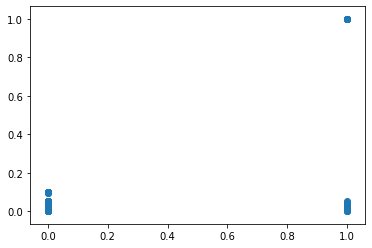

In [280]:
plt.scatter(y_test,predictions)

In [281]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0030308336293534675
MSE: 0.0016792962643711396
RMSE: 0.040979217468994446


## Decision Tree 

In [207]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [208]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [209]:
param_grid = {
    'max_depth': [4, 8, 10, 20, 25, 30], 
    'min_samples_split': [10, 20, 40, 60, 80], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.9984416016126904
Initial parameters:  {'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [212]:
from sklearn import tree

plotDecisionTree(bestClassTree, feature_names=train_X.columns)

NameError: name 'plotDecisionTree' is not defined

In [211]:
#Confusion Matrix
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

NameError: name 'classificationSummary' is not defined

Models- KNN , Random Forest, XG Boost

CLASSIFICATION MODEL PERFORMANCES
1. CONFUSION MATRIX
From the confusion matrix, we can infer accuracy, precision, recall and F-1 score.
FALSE POSITIVE & FALSE NEGATIVE
3. RECEIVER OPERATOR CURVE (ROC) & AREA UNDER THE CURVE (AUC)
4. CUMULATIVE ACCURACY PROFILE CURVE

